# Limpieza de Datos

Los datos utilizados para la ejcución del trabajo, fueron datos recopilados de los Airnbn donde se especifica ciertaas caracteristicas como lo son: los precios, la disponibilidad y las reseñas.

Se realizo la importación de las libresrias necesarias, asi como tambiem, la carga de dataset inicial.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Asi  bien, se realiza un planteamiento de la información general de los datos donde se observa la composición como: los tipos de datos presentes en cada columna, la cantidad de valores nulos, la cantidad de variables, los valores faltante y los valores duplicados.

In [4]:
print("INFORMACIÓN GENERAL")
print(df.info())

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review 

In [5]:
print(f"\nFilas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n PRIMERAS 10 FILAS")
df.head(10)


Filas: 48895, Columnas: 16

 PRIMERAS 10 FILAS


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
print("COLUMNAS DEL DATASET")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

COLUMNAS DEL DATASET
1. id
2. name
3. host_id
4. host_name
5. neighbourhood_group
6. neighbourhood
7. latitude
8. longitude
9. room_type
10. price
11. minimum_nights
12. number_of_reviews
13. last_review
14. reviews_per_month
15. calculated_host_listings_count
16. availability_365


In [8]:
print("VALORES NULOS POR COLUMNA")
nulos = df.isnull().sum()
print(nulos[nulos > 0])

VALORES NULOS POR COLUMNA
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [9]:
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


In [9]:
print("VALORES ÚNICOS POR COLUMNA")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

VALORES ÚNICOS POR COLUMNA
id: 48895 valores únicos
name: 47905 valores únicos
host_id: 37457 valores únicos
host_name: 11452 valores únicos
neighbourhood_group: 5 valores únicos
neighbourhood: 221 valores únicos
latitude: 19048 valores únicos
longitude: 14718 valores únicos
room_type: 3 valores únicos
price: 674 valores únicos
minimum_nights: 109 valores únicos
number_of_reviews: 394 valores únicos
last_review: 1764 valores únicos
reviews_per_month: 937 valores únicos
calculated_host_listings_count: 47 valores únicos
availability_365: 366 valores únicos


## Tratamiento de los Datos 

Dando continuidad a lo anteriormente mencionado, se eliminaron celdas inncesarias o duplicadas, asi como la inspeción de datos faltantes como por ejemplo algunas reseñas; se realizo tambien la limpieza de precios inconsistentes como lo son precios negativos de las viviendas y una subdivición de la variable categorica según el tipo de texto. 

In [10]:
print("ANÁLISIS DE VALORES NULOS")
nulos_info = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df)) * 100
})
nulos_info = nulos_info[nulos_info['Nulos'] > 0]
print(nulos_info)

ANÁLISIS DE VALORES NULOS
                             Columna  Nulos  Porcentaje
name                            name     16    0.032723
host_name                  host_name     21    0.042949
last_review              last_review  10052   20.558339
reviews_per_month  reviews_per_month  10052   20.558339


In [15]:
df_limpio = df.dropna(subset=['name', 'host_name'])


In [16]:
df_limpio['reviews_per_month'].fillna(0, inplace=True)

C:\Users\crica\AppData\Local\Temp\ipykernel_13864\848524411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['reviews_per_month'].fillna(0, inplace=True)
C:\Users\crica\AppData\Local\Temp\ipykernel_13864\848524411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['reviews_per_month'].fillna(0, inplace=True)


In [17]:
print(f"Filas originales: {len(df)}")
print(f"Filas después de limpieza: {len(df_limpio)}")
print(f"Filas eliminadas: {len(df) - len(df_limpio)}")

Filas originales: 48895
Filas después de limpieza: 48858
Filas eliminadas: 37


Se da un conteo a cada una de las filas

In [18]:
print(f"Duplicados antes: {df_limpio.duplicated().sum()}")

Duplicados antes: 0


In [19]:
print(f"Duplicados después: {df_limpio.duplicated().sum()}")
print(f"Total de filas ahora: {len(df_limpio)}")

Duplicados después: 0
Total de filas ahora: 48858


In [20]:
print("ANÁLISIS DE PRECIOS")
print(f"Precio mínimo: ${df_limpio['price'].min()}")
print(f"Precio máximo: ${df_limpio['price'].max()}")
print(f"Precios = 0: {(df_limpio['price'] == 0).sum()}")


ANÁLISIS DE PRECIOS
Precio mínimo: $0
Precio máximo: $10000
Precios = 0: 11


In [21]:
df_limpio = df_limpio[df_limpio['price'] > 0]
print(f"\nFilas después de eliminar precios = 0: {len(df_limpio)}")


Filas después de eliminar precios = 0: 48847


In [22]:
print("ANÁLISIS DE NOCES MINIMAS POR PERSONAS")
print(df_limpio['minimum_nights'].describe())


ANÁLISIS DE NOCES MINIMAS POR PERSONAS
count    48847.000000
mean         7.012365
std         20.021362
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


In [23]:
df_limpio = df_limpio[df_limpio['minimum_nights'] <= 365]
print(f"Filas después de limpiar minimum_nights: {len(df_limpio)}")

Filas después de limpiar minimum_nights: 48834


In [24]:
columnas_texto = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

for col in columnas_texto:
    df_limpio[col] = df_limpio[col].str.strip()

print("✓ Espacios en blanco eliminados de columnas de texto")

✓ Espacios en blanco eliminados de columnas de texto


In [26]:
print("-" * 50)
print("RESUMEN DESPUÉS DE LA LIMPIEZA")
print("-" * 50)
print(f"✓ Filas finales: {df_limpio.shape[0]}")
print(f"✓ Columnas finales: {df_limpio.shape[1]}")
print(f"\n✓ Valores nulos restantes:")
print(df_limpio.isnull().sum()[df_limpio.isnull().sum() > 0])
print(f"\n✓ Duplicados: {df_limpio.duplicated().sum()}")
print(f"\n✓ Tipos de datos correctos:")
print(df_limpio.dtypes)

--------------------------------------------------
RESUMEN DESPUÉS DE LA LIMPIEZA
--------------------------------------------------
✓ Filas finales: 48834
✓ Columnas finales: 16

✓ Valores nulos restantes:
last_review    10029
dtype: int64

✓ Duplicados: 0

✓ Tipos de datos correctos:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [27]:
df_limpio.to_csv('AB_NYC_2019_LIMPIO.csv', index=False)
print("✓ Archivo guardado como: AB_NYC_2019_LIMPIO.csv")

✓ Archivo guardado como: AB_NYC_2019_LIMPIO.csv


In [27]:
!pip install matplotlib
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------- -------- 5.5/7.0 MB 37.4 MB/s eta 0:00:01
   ----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\crica\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
import matplotlib.pyplot as plt
print("✓ Matplotlib instalado correctamente")

✓ Matplotlib instalado correctamente


In [28]:
import matplotlib.pyplot as plt

## Visualización de la Limpieza de Datos

Despúes de la correcta exortación de los datos se realizo una visualización del dataset en la cual se buca comunicar con claridad los efectos encontrados. por lo que, tenemos como primer grafico el top 10 de vecindarios con mayor cantidad de propietarios, lo cual nos deja observar la facilidad de compra y adquisión de la propiedad por vecindarios; asi como tambien, los vecindarios con mayor popularidad de compra.

En el segundo grafico tenemos la distribución de los tipos de habitación, revelando el tipo de preferencia de los anfitriones y la oferta disponible para viajeros. para el tercer grafico identifica las areas con mayor números de Airbnb por las 5 principales zonas de NY. por ultimo, el cuarto grafico nos muestra el precio promedio por habitación lo cual deja en evidencia una clara referencia de preciós para los anfitriones y personas que deseen incoorporarse a este mercado, asi como tambien la facilidad de un presupuesto para los viajeros.

In [29]:
df_limpio

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


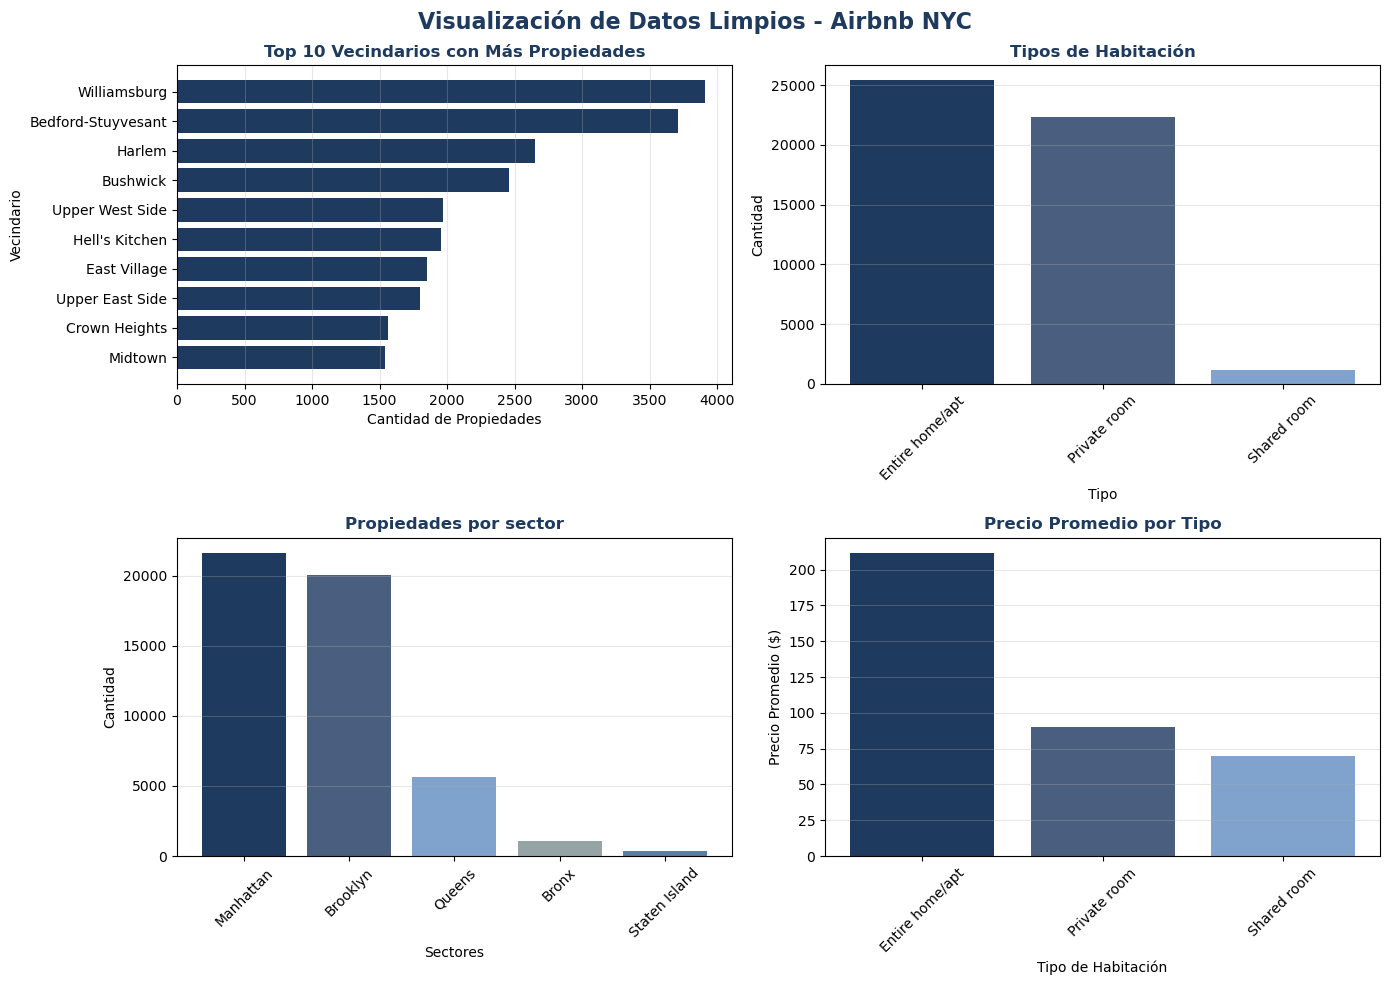


 ESTADÍSTICAS RESUMEN:
Total de propiedades: 48,834
Precio promedio: $152.78
Vecindario más popular: Williamsburg
Tipo más común: Entire home/apt


In [31]:
color_principal = '#1e3a5f'  # Azul oscuro
color_secundario = '#4a5f7f'  # Azul grisáceo
color_acento = '#7fa3cc'     # Azul claro
color_gris = '#95a5a6'       # Gris

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Visualización de Datos Limpios - Airbnb NYC', fontsize=16, fontweight='bold', color=color_principal)

top_neighbourhoods = df_limpio['neighbourhood'].value_counts().head(10)
axes[0, 0].barh(top_neighbourhoods.index, top_neighbourhoods.values, color=color_principal)
axes[0, 0].set_title('Top 10 Vecindarios con Más Propiedades', fontsize=12, fontweight='bold', color=color_principal)
axes[0, 0].set_xlabel('Cantidad de Propiedades')
axes[0, 0].set_ylabel('Vecindario')
axes[0, 0].invert_yaxis()  # Para que el más alto esté arriba
axes[0, 0].grid(axis='x', alpha=0.3)

room_counts = df_limpio['room_type'].value_counts()
colores_room = [color_principal, color_secundario, color_acento]
axes[0, 1].bar(room_counts.index, room_counts.values, color=colores_room)
axes[0, 1].set_title('Tipos de Habitación', fontsize=12, fontweight='bold', color=color_principal)
axes[0, 1].set_xlabel('Tipo')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

neighbourhood_counts = df_limpio['neighbourhood_group'].value_counts()
colores_borough = [color_principal, color_secundario, color_acento, color_gris, '#5a7fa3']
axes[1, 0].bar(neighbourhood_counts.index, neighbourhood_counts.values, color=colores_borough)
axes[1, 0].set_title('Propiedades por sector', fontsize=12, fontweight='bold', color=color_principal)
axes[1, 0].set_xlabel('Sectores')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

precio_promedio = df_limpio.groupby('room_type')['price'].mean()
axes[1, 1].bar(precio_promedio.index, precio_promedio.values, color=[color_principal, color_secundario, color_acento])
axes[1, 1].set_title('Precio Promedio por Tipo', fontsize=12, fontweight='bold', color=color_principal)
axes[1, 1].set_xlabel('Tipo de Habitación')
axes[1, 1].set_ylabel('Precio Promedio ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n ESTADÍSTICAS RESUMEN:")
print(f"Total de propiedades: {len(df_limpio):,}")
print(f"Precio promedio: ${df_limpio['price'].mean():.2f}")
print(f"Vecindario más popular: {df_limpio['neighbourhood'].mode()[0]}")
print(f"Tipo más común: {df_limpio['room_type'].mode()[0]}")

## Conclusiones

Manhattan y Brooklyn cuentan con mayor concentración de personas, lo cual refleja la concentración de los turistas; asi como su preferencia a los apartamentos completos y las habitaciones privadas y la evidente concentración de los vecindarios y el costo promedio por alojamiento. con respecto a la limpieza de datos, se eliminaron de forma correcta los valores nulos, duplicados o que presentaban alguna inconsistencia. manteniendo la integridad y volumen de toda la data. Esto nos permitio realizar el respectivo analisis de mercado posterior.